<a href="https://colab.research.google.com/github/Chiomanwafor-ui/FreeCodeCamp_Projects/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3
train_image_generator = None
validation_image_generator = None
test_image_generator = None

train_data_gen = None
val_data_gen = None
test_data_gen = None




# 3
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_dir = './cats_and_dogs/train'
validation_dir = './cats_and_dogs/validation'
test_dir = './cats_and_dogs/test'

# Create ImageDataGenerators
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# For test, there are no subfolders → use flow_from_directory with "test_dir" trick
test_data_gen = test_image_generator.flow_from_directory(
    batch_size=1,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


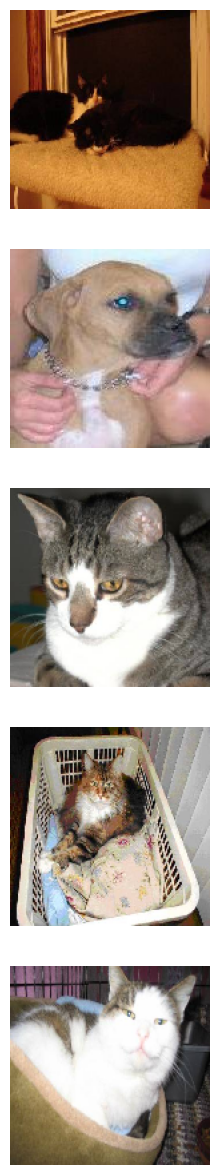

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



Found 2000 images belonging to 2 classes.


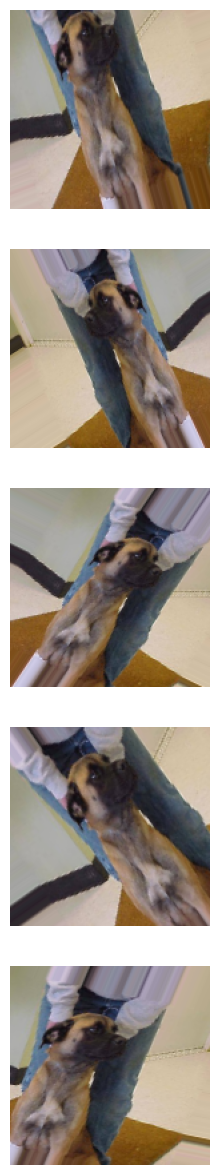

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
EPOCHS = 20
steps_per_epoch = train_data_gen.samples // BATCH_SIZE
validation_steps = val_data_gen.samples // BATCH_SIZE

history = model.fit(
    train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=validation_steps
)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 107s 7s/step - accuracy: 0.4906 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 2/20
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:26 6s/step - accuracy: 0.4922 - loss: 0.6964

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4922 - loss: 0.6964 - val_accuracy: 0.4989 - val_loss: 0.6934
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 142s 10s/step - accuracy: 0.5379 - loss: 0.6865 - val_accuracy: 0.5759 - val_loss: 0.6862
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5469 - loss: 0.6856 - val_accuracy: 0.5826 - val_loss: 0.6752
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 133s 9s/step - accuracy: 0.5274 - loss: 0.6870 - val_accuracy: 0.5089 - val_loss: 0.6899
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 898ms/step - accuracy: 0.5469 - loss: 0.6861 - val_accuracy: 0.4967 - val_loss: 0.6901
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 156s 7s/step - accuracy: 0.4869 - loss: 0.6899 - val_accuracy: 0.5022 - val_loss: 0.6877
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5391 - loss: 0.6779 - val_accuracy: 0.4967 - val_loss: 0.6881
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 122s 7s/step - accuracy: 0.5192 - loss: 0.6859 - val_accuracy: 0.4978 - val_loss: 0.

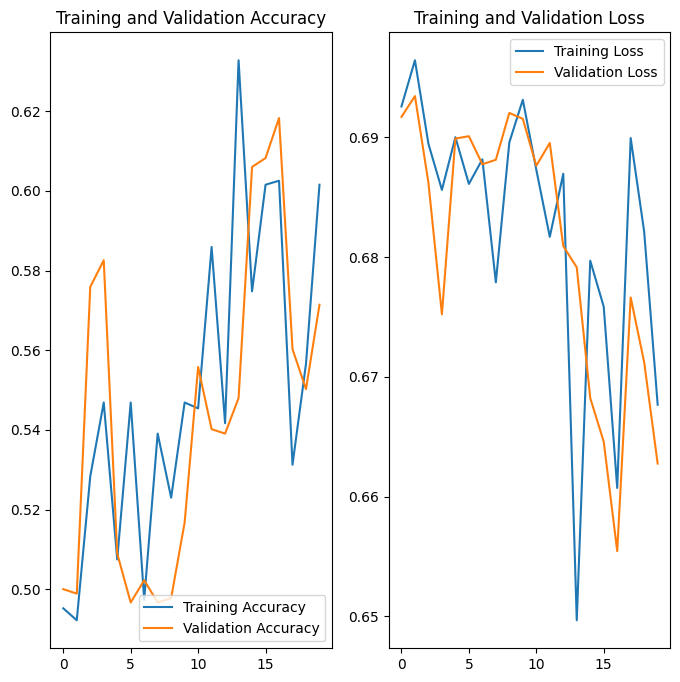

In [ ]:
# 9
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:

# 10
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a temporary subfolder structure for test_dir if not already present
test_subdir = os.path.join(test_dir, "test")
if not os.path.exists(test_subdir):
    os.makedirs(test_subdir)

# Move all test images into the subfolder if they're not already
for fname in os.listdir(test_dir):
    fpath = os.path.join(test_dir, fname)
    if os.path.isfile(fpath):  # only move files
        os.rename(fpath, os.path.join(test_subdir, fname))

# Now create the generator
test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(
    batch_size=1,
    directory=test_dir,               # note: parent directory
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,                  # no labels
    shuffle=False
)




Found 50 images belonging to 1 classes.


In [ ]:
import tensorflow as tf
import zipfile
import os

# Download dataset (about 60MB)
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url, extract=True)

# Extracted folder path
base_dir = os.path.join(os.path.dirname(zip_path), "cats_and_dogs_filtered")

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = validation_dir  # 👈 use validation as test (since dataset has only train/validation)

print(" Dataset available at:", base_dir)


 Dataset available at: /root/.keras/datasets/cats_and_dogs_filtered


In [ ]:
import os
print(os.listdir('/content'))


['.config', 'cats_and_dogs', '__MACOSX', 'cats_and_dogs.zip', 'sample_data']


In [ ]:
# 1. Generate predictions from your trained model
probabilities = model.predict(test_data_gen)

# 2. Evaluate with given answers list
answers = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
           1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
           1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
           1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
           0, 0, 0, 0, 0, 0]

correct = 0
for probability, answer in zip(probabilities, answers):
    if round(probability[0]) == answer:   # take index 0 since predict() returns [[p], [p], ...]
        correct += 1

percentage_identified = (correct / len(answers)) * 100
passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print(" You passed the challenge!")
else:
    print(" You haven't passed yet. Your model should identify at least 63% of the images. Keep training!")


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
Your model correctly identified 52.0% of the images of cats and dogs.
 You haven't passed yet. Your model should identify at least 63% of the images. Keep training!


In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_data_gen, steps=validation_steps)
print("\nValidation accuracy:", val_accuracy)

if val_accuracy >= 0.63:
    print("\nCongratulations! You passed the challenge.")
else:
    print("\nKeep training or adjusting your model to improve accuracy.")


7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5529 - loss: 0.6679

Validation accuracy: 0.5736607313156128

Keep training or adjusting your model to improve accuracy.
